In [1]:
from CropManager import Crop
from utils.data import sample_distribution, split_dataset
from Data import TFRecordBuilder, DataBuilder
from Visualizer.Grid import display_grid_from_path
import os

2025-07-20 16:48:28.990132: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-20 16:48:28.994118: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-20 16:48:29.003631: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753044509.017435  115248 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753044509.021663  115248 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1753044509.032746  115248 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:
data_dir = "../../BUSI_DATASET/Dataset_BUSI_with_GT"
crop_dir = "../../TEST"
tf_records_path = "../../TFRecords"


cropper = Crop(data_dir, crop_dir)

In [4]:
cropper.generate_crops()

True

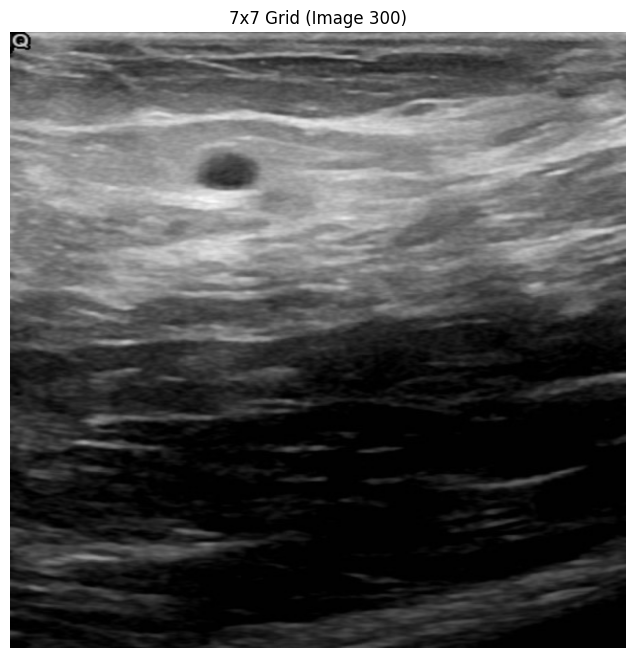

In [3]:
display_grid_from_path(crop_dir, 300, 7, mask=False, spacing=0)

In [4]:
data_builder = DataBuilder(crop_dir)
df = data_builder.build_dataframe()
df

,image_path,mask_path,mask_class
0,../../TEST/image_699/image_699_grid_10_92.png,../../TEST/image_699/image_699_grid_10_92_mask...,negative
1,../../TEST/image_699/image_699_grid_10_35.png,../../TEST/image_699/image_699_grid_10_35_mask...,negative
2,../../TEST/image_699/image_699_grid_8_56.png,../../TEST/image_699/image_699_grid_8_56_mask.png,negative
3,../../TEST/image_699/image_699_grid_5_10.png,../../TEST/image_699/image_699_grid_5_10_mask.png,negative
4,../../TEST/image_699/image_699_grid_10_32.png,../../TEST/image_699/image_699_grid_10_32_mask...,negative
...,...,...,...
294835,../../TEST/image_297/image_297_grid_8_34.png,../../TEST/image_297/image_297_grid_8_34_mask.png,negative
294836,../../TEST/image_297/image_297_grid_6_7.png,../../TEST/image_297/image_297_grid_6_7_mask.png,negative
294837,../../TEST/image_297/image_297_grid_5_17.png,../../TEST/image_297/image_297_grid_5_17_mask.png,positive
294838,../../TEST/image_297/image_297_grid_7_44.png,../../TEST/image_297/image_297_grid_7_44_mask.png,negative


In [5]:
proportions = {'positive': 0.3, 'negative': 0.7}
balanced_df = sample_distribution(df, class_column='mask_class', proportions=proportions, random_state=42)

In [6]:
balanced_df

,image_path,mask_path,mask_class
0,../../TEST/image_396/image_396_grid_5_3.png,../../TEST/image_396/image_396_grid_5_3_mask.png,negative
1,../../TEST/image_77/image_77_grid_6_16.png,../../TEST/image_77/image_77_grid_6_16_mask.png,negative
2,../../TEST/image_679/image_679_grid_6_4.png,../../TEST/image_679/image_679_grid_6_4_mask.png,negative
3,../../TEST/image_458/image_458_grid_10_50.png,../../TEST/image_458/image_458_grid_10_50_mask...,negative
4,../../TEST/image_768/image_768_grid_7_11.png,../../TEST/image_768/image_768_grid_7_11_mask.png,negative
...,...,...,...
172085,../../TEST/image_735/image_735_grid_9_3.png,../../TEST/image_735/image_735_grid_9_3_mask.png,negative
172086,../../TEST/image_389/image_389_grid_10_15.png,../../TEST/image_389/image_389_grid_10_15_mask...,negative
172087,../../TEST/image_774/image_774_grid_10_33.png,../../TEST/image_774/image_774_grid_10_33_mask...,negative
172088,../../TEST/image_89/image_89_grid_7_41.png,../../TEST/image_89/image_89_grid_7_41_mask.png,negative


In [7]:
train_df, test_df = split_dataset(balanced_df)

Split Summary:
Train: 137672
Test: 34418


In [8]:
os.makedirs(tf_records_path, exist_ok=True)
train_tfrecords = TFRecordBuilder(train_df, tf_records_path)
train_tfrecords.write_tfrecord("Train")

Writing Train: 100%|██████████| 137672/137672 [16:24<00:00, 139.85it/s]

✅ Saved Train to ../../TFRecords/train.tfrecord


In [13]:
import shutil
shutil.make_archive('tfrecords', 'zip', '../../TFRecords')

'/home/nifdi-guliyev/Documents/GitHub/Cancer-Segmentation/Notebooks/Processing/tfrecords.zip'